In [1]:
import requests
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [36]:
url='https://www.dsgap.gov.mo/pafp/api/fund/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
r=requests.get(url, headers=headers)
data=r.json()

In [14]:
import re
regex=r'\(([^)]*)\)|\（([^）]*)\）'
regex=r'\((.*?)\)|\（(.*?)\）'

edges=[]
for entity in data:
    entity_name=entity['nameTc']
    try:
        for council in company['revision']['json']['architectureList']:
            for member in council['memberList']:
                member_name = re.sub(regex, '', member.get('name').get('tc'))
                if (member_name is not None) or (member_name==''):
                    edges.append((entity_name, member_name))
    except:
        pass

edges=set(edges)

In [67]:
def recursive_dict_loop(item, lst=None):
    if lst is None:
        lst = []

    if isinstance(item, list):
        for element in item:
            recursive_dict_loop(element, lst)
    elif isinstance(item, dict):
        for key, value in item.items():
            if isinstance(value, (dict, list)):
                if key != 'title':
                    recursive_dict_loop(value, lst)  # Recursion for nested dictionaries and lists
            else:
                if key == 'tc' and not re.search('會$', value):
                    lst.append(value)  # Process the key-value pair
    return lst

def get_full_member(item):
    lst=[]
    architecture=['architectureList', 'architectureMemberList']
    for council in architecture:
        lst=lst+recursive_dict_loop(item.get(council))
    return lst



G=nx.Graph()
for item in data:
    entity_name=item['nameTc']
    lst_member=get_full_member(item['revision']['json'])
    G.add_nodes_from([(entity_name, {'type': 'company'})])
    for member in lst_member:
        G.add_nodes_from([(member, {'type': 'member'})])
        G.add_edge(entity_name, member)

285.0


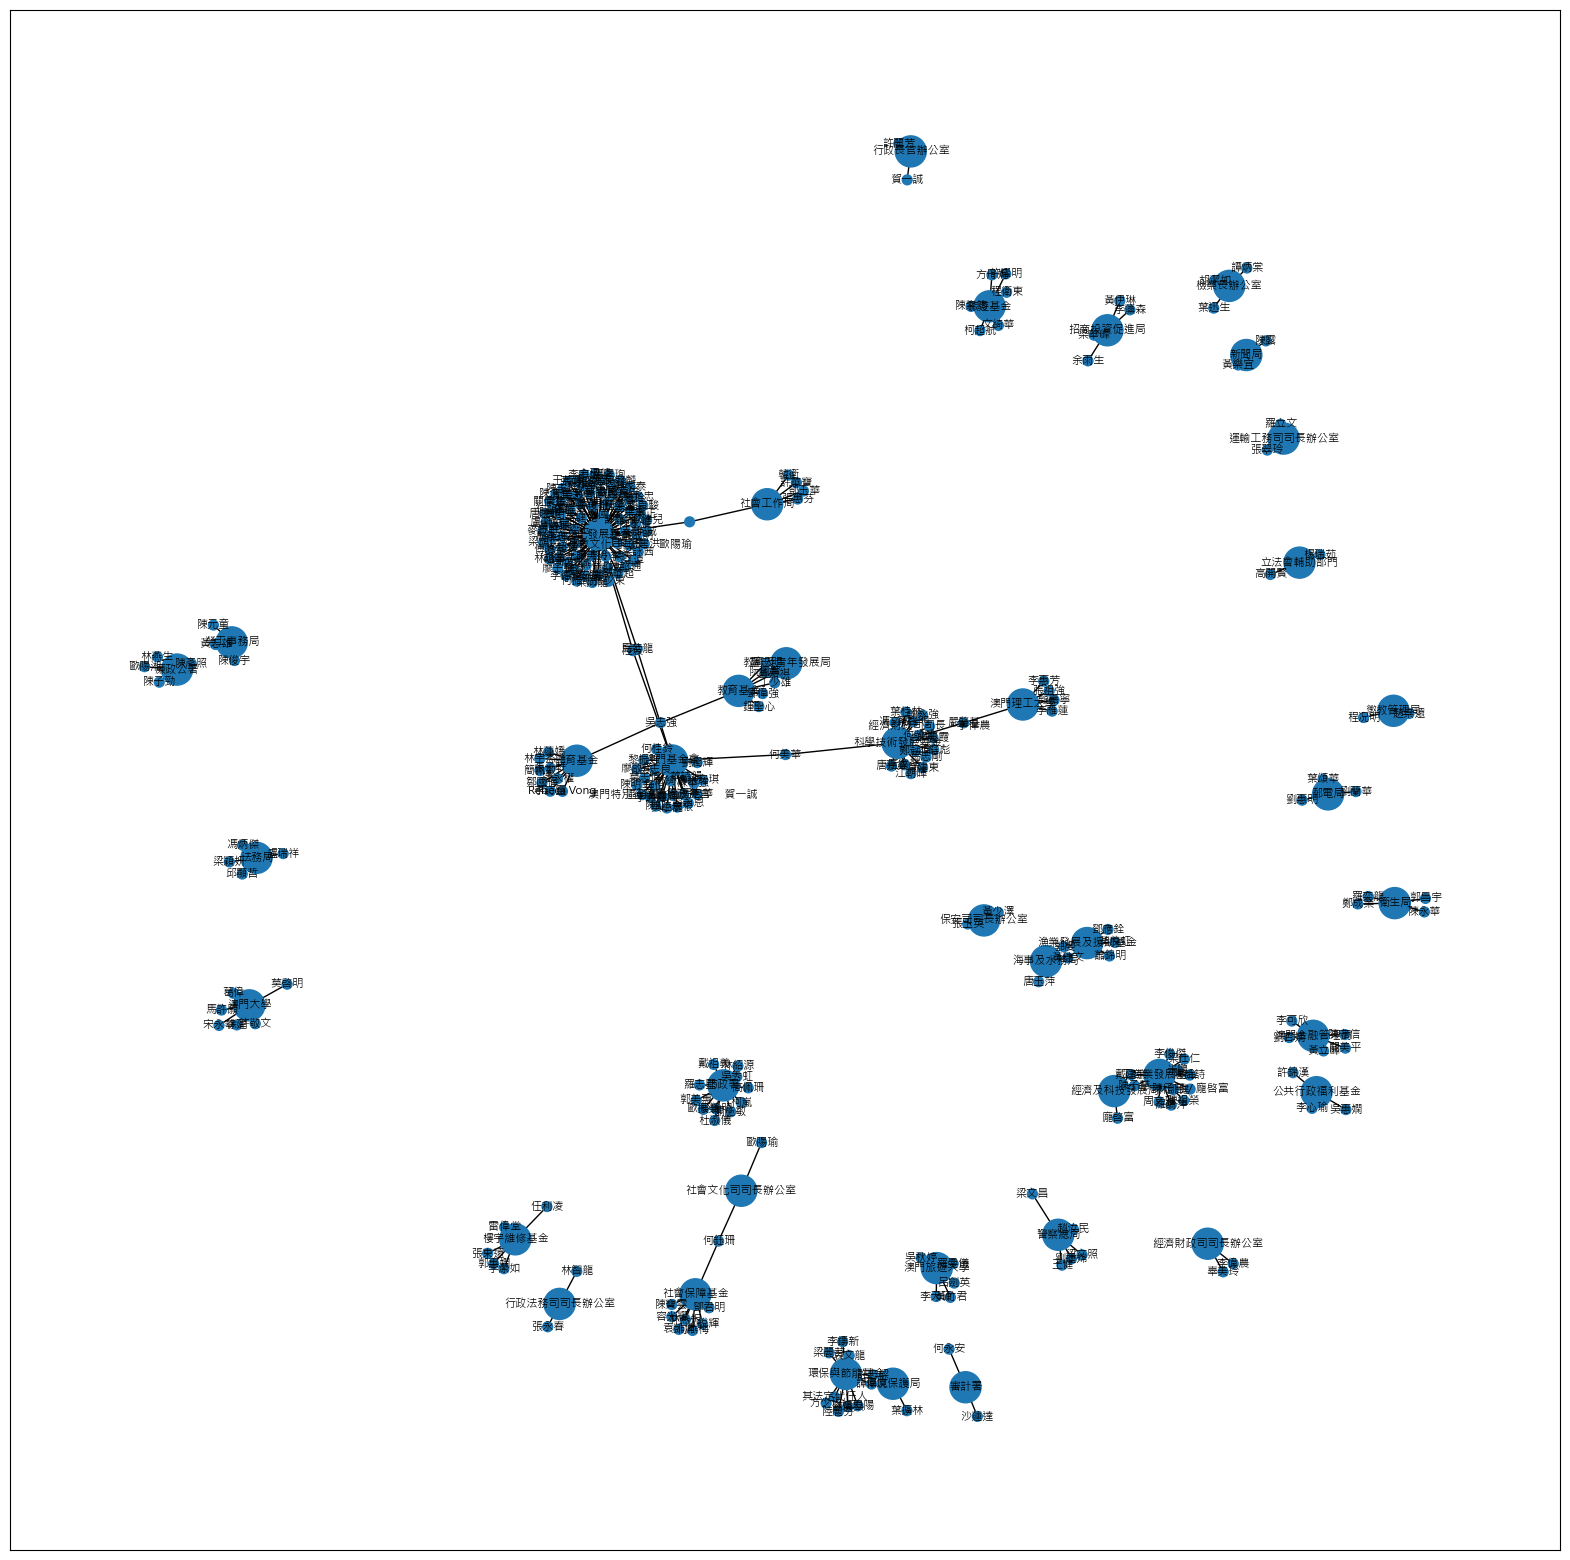

In [70]:
weight={node[0]:1 if node[1]['type']=='member' else 10 for node in G.nodes(data=True)}
nx.set_node_attributes(G, weight ,'weight')

plt.rcParams['font.sans-serif']='Microsoft JhengHei'
print(G.size(weight="weight"))
plt.figure(3,figsize=(20,20))
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True, node_size=[i*50 for i in nx.get_node_attributes(G,'weight').values()] ,font_size=8)